# Labo 1 BUI


étudiants: Julien Billeter, Julien Muhlemann
date: 20:09:2024


In [7]:
import pandas as pd
data = pd.read_csv('data_ibm.csv')


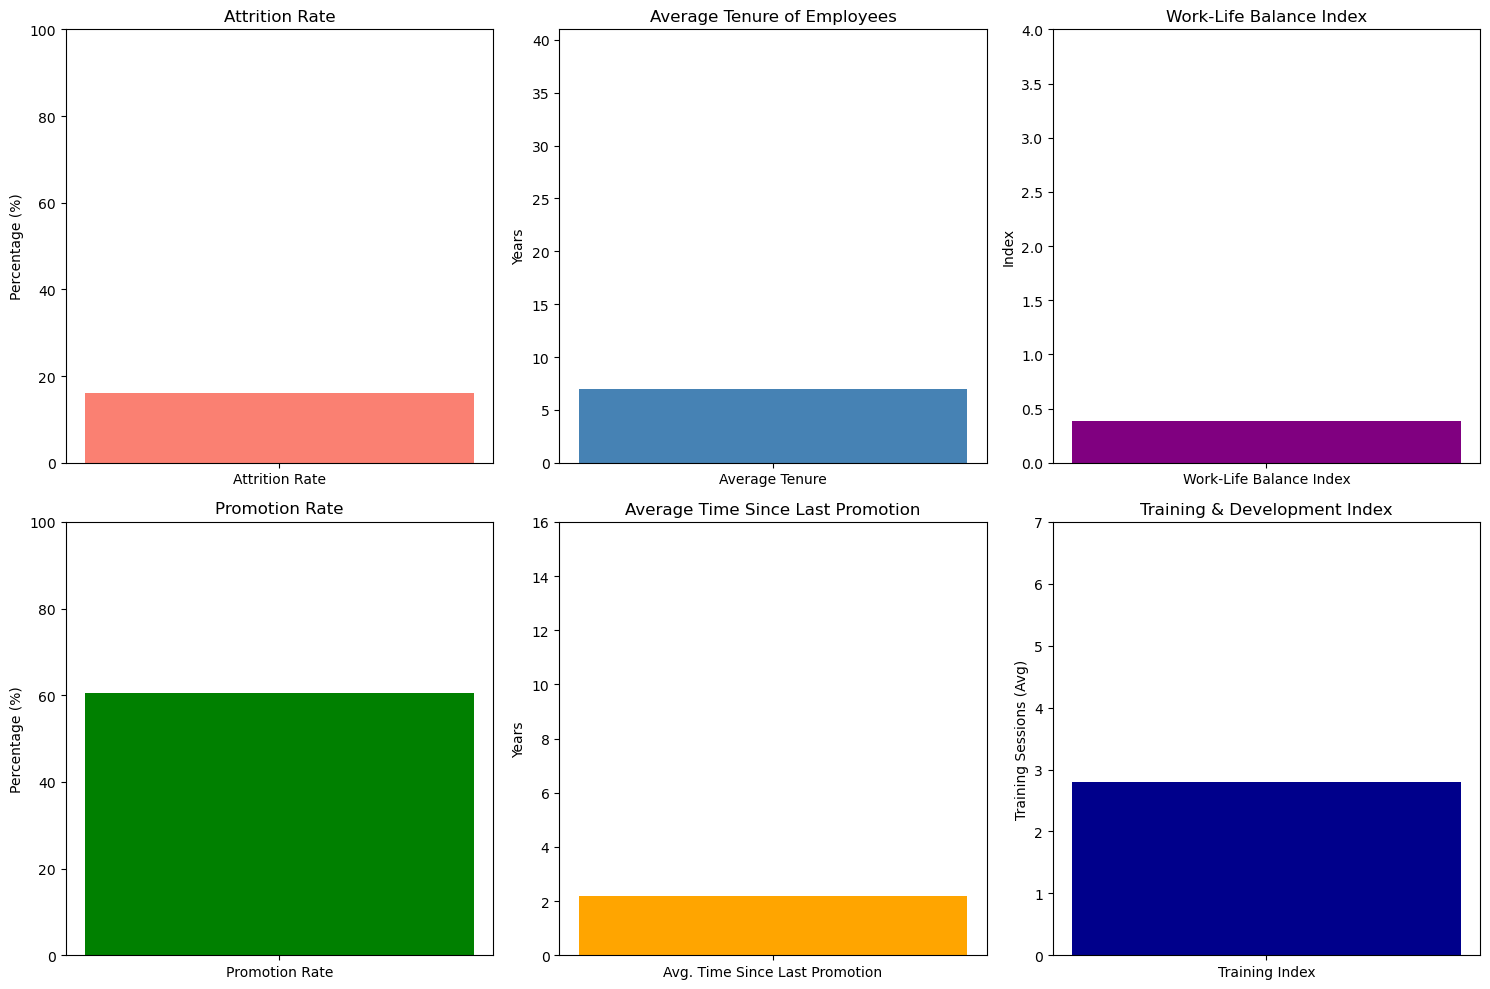

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Attrition Rate
def calculate_attrition_rate(df):
    total_employees = len(df)
    attrition_count = df[df['Attrition'] == 'Yes'].shape[0]
    attrition_rate = (attrition_count / total_employees) * 100
    return round(attrition_rate, 2)

# 2. Average Tenure
def calculate_average_tenure(df):
    return round(df['YearsAtCompany'].mean(), 2)

# 3. Work-Life Balance Index
def calculate_work_life_balance_index(df):
    travel_weight = df['BusinessTravel'].apply(lambda x: 0.5 if x == 'Travel_Frequently' else (0.75 if x == 'Travel_Rarely' else 1))
    distance_weight = 1 / (df['DistanceFromHome'] + 1)
    work_life_balance = (df['WorkLifeBalance'] * travel_weight * distance_weight).mean()
    return round(work_life_balance, 2)

# 4. Promotion Rate
def calculate_promotion_rate(df):
    total_employees = len(df)
    promoted_employees = df[df['YearsSinceLastPromotion'] > 0].shape[0]
    promotion_rate = (promoted_employees / total_employees) * 100
    return round(promotion_rate, 2)

# Avg time since last promotion
def calculate_avg_time_since_promotion(df):
    return round(df['YearsSinceLastPromotion'].mean(), 2)

# 5. Training & Development Index
def calculate_training_index(df):
    return round(df['TrainingTimesLastYear'].mean(), 2)

# Calculate all KPIs
attrition_rate = calculate_attrition_rate(data)
average_tenure = calculate_average_tenure(data)
work_life_balance_index = calculate_work_life_balance_index(data)
promotion_rate = calculate_promotion_rate(data)
avg_time_since_promotion = calculate_avg_time_since_promotion(data)
training_index = calculate_training_index(data)

# Create subplots (matrix 2x3)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# KPI 1: Attrition Rate
axs[0, 0].bar(['Attrition Rate'], [attrition_rate], color='salmon')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Attrition Rate')
axs[0, 0].set_ylim(0, 100)

# KPI 2: Average Tenure
axs[0, 1].bar(['Average Tenure'], [average_tenure], color='steelblue')
axs[0, 1].set_ylabel('Years')
axs[0, 1].set_title('Average Tenure of Employees')
axs[0, 1].set_ylim(0, data['YearsAtCompany'].max() + 1)

# KPI 3: Work-Life Balance Index
axs[0, 2].bar(['Work-Life Balance Index'], [work_life_balance_index], color='purple')
axs[0, 2].set_ylabel('Index')
axs[0, 2].set_title('Work-Life Balance Index')
axs[0, 2].set_ylim(0, 4)

# KPI 4: Promotion Rate
axs[1, 0].bar(['Promotion Rate'], [promotion_rate], color='green')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Promotion Rate')
axs[1, 0].set_ylim(0, 100)

# KPI 5: Avg Time Since Last Promotion
axs[1, 1].bar(['Avg. Time Since Last Promotion'], [avg_time_since_promotion], color='orange')
axs[1, 1].set_ylabel('Years')
axs[1, 1].set_title('Average Time Since Last Promotion')
axs[1, 1].set_ylim(0, data['YearsSinceLastPromotion'].max() + 1)

# KPI 6: Training & Development Index
axs[1, 2].bar(['Training Index'], [training_index], color='darkblue')
axs[1, 2].set_ylabel('Training Sessions (Avg)')
axs[1, 2].set_title('Training & Development Index')
axs[1, 2].set_ylim(0, data['TrainingTimesLastYear'].max() + 1)

# Adjust layout
plt.tight_layout()
plt.show()
